### **1) Consider this dataset from kaggle. (Download the dataset from following link: https://www.kaggle.com/shrutimechlearnstep-by-step-kmeans-explained-in-detail/data) and answer the following questions**

> 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure.



>  1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as‘Labels’ and fill it with cluster number assigned by k-means algorithm.


> 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression,decision trees, random forest, and Naive Bayes algorithm


 > 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of
clusters, like is the clusters or groups are making sense or not ?

In [404]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## K-means clustering using Manhattan distance - Performed on all the columns of Dataset

In [405]:
# Read in the data from the data folder
df = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 2/archive/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [406]:
# convert categorical data to numerical
df["Genre"] = df["Genre"].astype("category").cat.codes
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [407]:
#dropping CustomerID column
df = df.drop(['CustomerID'], axis=1)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Scaling the dataset  otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired.

In [408]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [409]:
# convert dataframe to matrix
mat = scaled_df.values 
mat

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

#### Applying manhattan distance metric

In [410]:
#importing manhattan distance metric
from sklearn.metrics.pairwise import manhattan_distances

In [411]:
manhattandist_mat = manhattan_distances(mat)
print(manhattandist_mat)

[[ 0.          1.77403893  3.40560503 ...  6.52852823  6.4048901
   7.15425262]
 [ 1.77403893  0.          5.03611058 ...  5.29799115  7.89186227
   5.38021369]
 [ 3.40560503  5.03611058  0.         ...  9.71426102  7.96011734
  10.33998541]
 ...
 [ 6.52852823  5.29799115  9.71426102 ...  0.          2.59387112
   0.91279115]
 [ 6.4048901   7.89186227  7.96011734 ...  2.59387112  0.
   2.66693483]
 [ 7.15425262  5.38021369 10.33998541 ...  0.91279115  2.66693483
   0.        ]]


#### Applying K-means 

In [412]:
# performing kmeans with manhattan distance matrix
import sklearn
from sklearn.cluster import KMeans
km1 = sklearn.cluster.KMeans(n_clusters=5, init='k-means++', random_state = 0)
km1.fit_predict(manhattandist_mat)

array([2, 2, 4, 3, 1, 3, 4, 3, 0, 3, 0, 3, 4, 3, 0, 2, 1, 2, 0, 3, 0, 2,
       4, 2, 4, 2, 4, 2, 1, 3, 0, 3, 0, 2, 4, 3, 4, 3, 1, 3, 4, 2, 0, 1,
       4, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 4, 1, 0, 2,
       1, 4, 2, 1, 0, 1, 4, 4, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 4, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 2, 0, 2,
       1, 3, 0, 3, 4, 2, 0, 3, 4, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0, 2, 4, 3,
       4, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 4, 3,
       0, 2, 0, 2, 1, 3, 0, 3, 1, 2, 4, 2, 4, 3, 4, 3, 0, 3, 4, 3, 4, 2,
       0, 2])

In [413]:
#printing out labels
labelswithmanhattan = km1.labels_
labelswithmanhattan

array([2, 2, 4, 3, 1, 3, 4, 3, 0, 3, 0, 3, 4, 3, 0, 2, 1, 2, 0, 3, 0, 2,
       4, 2, 4, 2, 4, 2, 1, 3, 0, 3, 0, 2, 4, 3, 4, 3, 1, 3, 4, 2, 0, 1,
       4, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 4, 1, 0, 2,
       1, 4, 2, 1, 0, 1, 4, 4, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 4, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 4, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 2, 0, 2,
       1, 3, 0, 3, 4, 2, 0, 3, 4, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0, 2, 4, 3,
       4, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 4, 3,
       0, 2, 0, 2, 1, 3, 0, 3, 1, 2, 4, 2, 4, 3, 4, 3, 0, 3, 4, 3, 4, 2,
       0, 2])

In [414]:
#printing out centers
km1.cluster_centers_

array([[4.7027592 , 5.87631706, 6.83658502, 7.57182709, 5.90884916,
        7.55763196, 5.86615282, 8.15545477, 3.82488966, 6.83859142,
        3.69828968, 7.60568736, 5.30471177, 7.35953431, 3.52236463,
        5.54821173, 5.51372661, 5.1357249 , 3.03466563, 7.4316824 ,
        3.40056485, 4.99489219, 5.28149816, 4.60584128, 4.98840529,
        4.98419408, 4.94139951, 3.82804953, 5.05471542, 7.52745584,
        3.28413998, 7.07932823, 3.04874483, 5.91684793, 4.80321552,
        7.3040195 , 4.88623305, 6.41619905, 4.99679777, 7.02573927,
        4.97686951, 5.3929283 , 2.56173543, 5.75535135, 4.57467528,
        6.33226689, 4.8838201 , 5.53561993, 5.34645349, 5.22684234,
        4.73773604, 3.50901265, 5.40769632, 3.10380096, 4.55675866,
        2.50725298, 4.64399788, 3.12794174, 5.49271926, 2.51245801,
        3.42251102, 4.09885578, 5.10663404, 4.90136514, 2.86006886,
        4.27474442, 4.66633822, 5.04380357, 4.20297773, 5.06164884,
        3.33926715, 4.41700749, 4.67602585, 4.88

#### Adding that seperate label column in dataset

In [415]:
#Adding this label column to dataframe
df["labelswithmanhattan1"] = labelswithmanhattan
df

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,4
197,1,32,126,74,2
198,1,32,137,18,0


#### Printing out the clusters to check whether they are making sense or not

In [416]:
df[df["labelswithmanhattan1"]==0]

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
8,1,64,19,3,0
10,1,67,19,14,0
14,1,37,20,13,0
18,1,52,23,29,0
20,1,35,24,35,0
30,1,60,30,4,0
32,1,53,33,4,0
42,1,48,39,36,0
53,1,59,43,60,0
55,1,47,43,41,0


* We can observe that the values of Annual_Income and Spending_score are very spread out and not very similar to each other. 

In [417]:
df[df["labelswithmanhattan1"]==1]

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
4,0,31,17,40,1
16,0,35,21,35,1
28,0,40,29,31,1
38,0,36,37,26,1
43,0,31,39,61,1
46,0,50,40,55,1
47,0,27,40,47,1
48,0,29,40,42,1
49,0,31,40,42,1
50,0,49,42,52,1


* We can observe that the values of Annual_Income and Spending_score are very spread out and not very similar to each other. But this cluster is better than cluster labbeled as 0 as values are comparable close

In [418]:
df[df["labelswithmanhattan1"]==2]

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
0,1,19,15,39,2
1,1,21,15,81,2
15,1,22,20,79,2
17,1,20,21,66,2
21,1,25,24,73,2
23,1,31,25,73,2
25,1,29,28,82,2
27,1,35,28,61,2
33,1,18,33,92,2
41,1,24,38,92,2


In [419]:
df[df["labelswithmanhattan1"]==3]

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
3,0,23,16,77,3
5,0,22,17,76,3
7,0,23,18,94,3
9,0,30,19,72,3
11,0,35,19,99,3
13,0,24,20,77,3
19,0,35,23,98,3
29,0,23,29,87,3
31,0,21,30,73,3
35,0,21,33,81,3


In [420]:
df[df["labelswithmanhattan1"]==4]

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1
2,0,20,16,6,4
6,0,35,18,6,4
12,0,58,20,15,4
22,0,46,25,5,4
24,0,54,28,14,4
26,0,45,28,32,4
34,0,49,33,14,4
36,0,42,34,17,4
40,0,65,38,35,4
44,0,49,39,28,4


#### Observation from clusters
* We can observe that the values of Annual_Income and Spending_score are very spread out and not very similar to each other in all the clusters. We can consider that clusters are not making great sense in this case. 
* The data points in the cluster are more dissimilar to each other than they are to other data points in other clusters.
* There can be several reason why this is happening maybe the value of k=5 is not optimal 
* The other reason can be all the features we are using to cluster the data are not relevent 
* We will now try to plot these clusters and will implement K-means clustering again with only relevant features

### Plotting clusters 

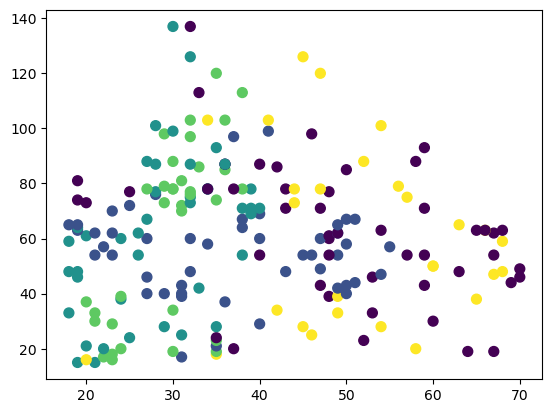

In [421]:
plt.scatter(df["Age"],df["Annual_Income_(k$)"],  c=labelswithmanhattan, s=50, cmap='viridis')

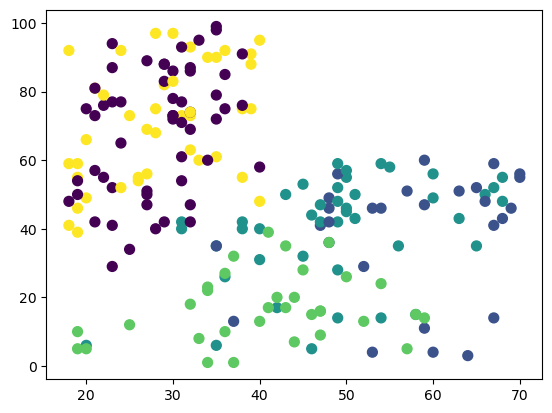

In [422]:
plt.scatter(df["Age"], df["Spending_Score"], c=labelswithoutmanhattan, s=50, cmap='viridis')

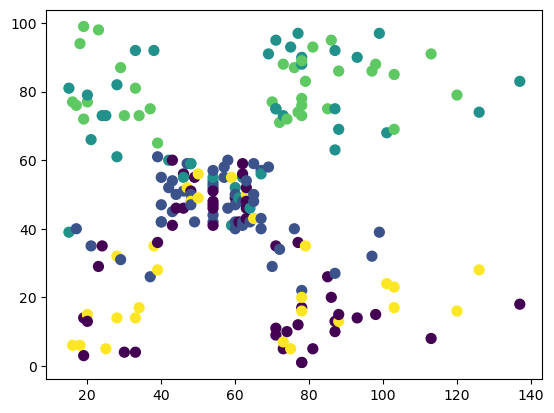

In [423]:
plt.scatter(df["Annual_Income_(k$)"], df["Spending_Score"], c=labelswithmanhattan, s=50, cmap='viridis')

### Observation from plots
* We can see that the clusters are not making great sense. The data in all the clusters is spread out.

## K-means clustering using Manhattan distance - Performed on only two columns of Dataset

In [424]:
#Clustering the data based on Annual income and Spending score as these features look more releveant
#It will be easy to create visualisation
X = df[["Annual_Income_(k$)","Spending_Score"]]
X.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


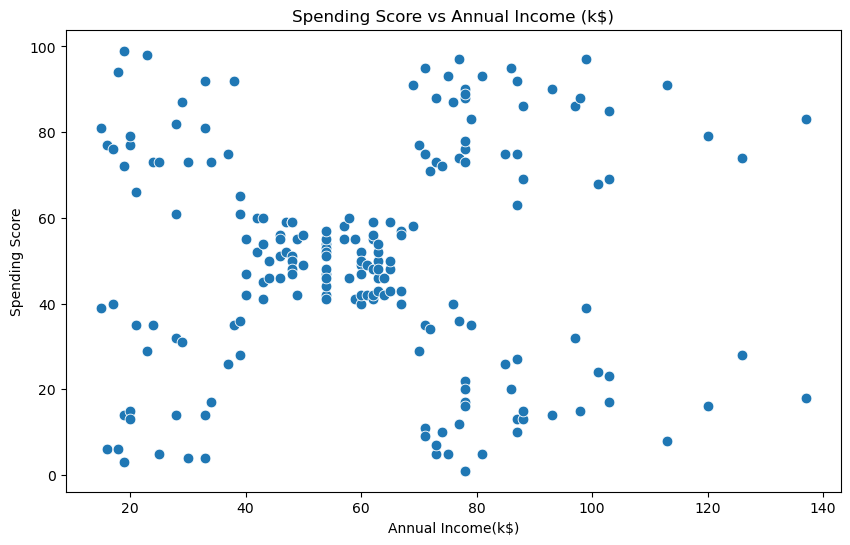

In [425]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income_(k$)',y = 'Spending_Score',  data = X  ,s = 60 )
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Annual Income (k$)')
plt.show()

In [426]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances

#### Using elbow method to find Optimal number of clusters

In [427]:
# FInding the optimal number of clusters using elbow method
# Loop through clusters and fit the model 
clusters=range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    meandist.append(sum(np.min(pairwise_distances(X, model.cluster_centers_, 'manhattan'), axis=1),X.shape[0]))

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


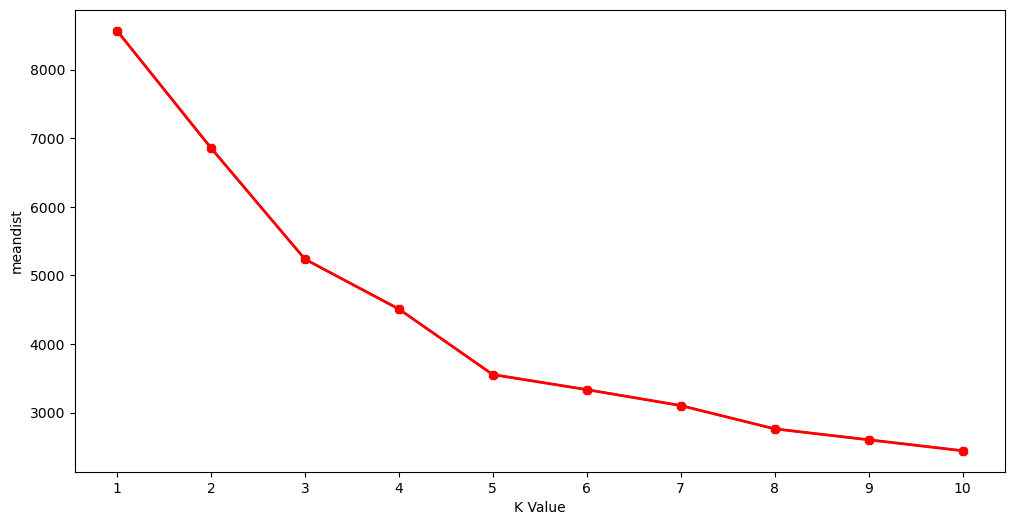

In [428]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),meandist)
plt.plot(range(1,11),meandist, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("meandist")
plt.show()

* From the plot we can see that after k=5 value the distance between the clusters is not changing significantly 
* So our optimal number of clusters will be 5

In [429]:
#printing out the dataset
X.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [430]:
#scaling this data
scaled = StandardScaler().fit_transform(X)

scaled_X = pd.DataFrame(scaled, columns=X.columns)

scaled_X.head()

,Annual_Income_(k$),Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [431]:
#performing K means
matrix = scaled_X.values # convert dataframe to matrix
matrix

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [432]:
from sklearn.metrics.pairwise import manhattan_distances

In [433]:
# using manhattan distance matrix
dist_mat = manhattan_distances(matrix)
print(dist_mat)

[[0.         1.63050555 1.31928093 ... 5.59556126 5.47192313 6.36481903]
 [1.63050555 0.         2.94978648 ... 4.50855756 7.10242868 4.73431348]
 [1.31928093 2.94978648 0.         ... 6.83850334 5.08435966 7.6077611 ]
 ...
 [5.59556126 4.50855756 6.83850334 ... 0.         2.59387112 0.76925777]
 [5.47192313 7.10242868 5.08435966 ... 2.59387112 0.         2.52340145]
 [6.36481903 4.73431348 7.6077611  ... 0.76925777 2.52340145 0.        ]]


#### Performing K-means

In [434]:
import sklearn
from sklearn.cluster import KMeans

In [435]:
#Using cluster = 5 as shown in elbow plot 
km2 = sklearn.cluster.KMeans(n_clusters=5, init='k-means++', random_state = 0)
km2.fit_predict(dist_mat)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [437]:
# Get cluster assignment labels
labels = km2.labels_
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [438]:
km2.cluster_centers_

array([[3.74871124, 5.37921679, 3.20586153, 5.18576112, 3.71119395,
        5.10877013, 3.12952267, 5.7693888 , 3.18598079, 4.87714503,
        2.95790412, 5.92532717, 2.91730835, 5.03308341, 2.92458739,
        5.11072653, 3.37411382, 4.56787681, 3.08668272, 5.73382789,
        3.25960553, 4.72511945, 2.88902649, 4.68695002, 2.61437926,
        4.92183578, 2.99774217, 4.106583  , 2.92560388, 5.07777415,
        2.73214821, 4.49610287, 2.61763992, 5.11920424, 2.42353212,
        4.69216707, 2.39264173, 4.34342515, 2.45768316, 4.30655999,
        2.72523352, 4.92835709, 2.72345931, 3.68671928, 2.44200299,
        3.84200552, 3.41562049, 3.105048  , 2.9109402 , 2.9109402 ,
        3.22281695, 3.53338943, 3.26229064, 3.49522   , 2.91289659,
        2.75761035, 3.06883497, 2.91354872, 3.03131767, 2.83720987,
        3.22542547, 3.18660391, 3.0319698 , 3.30372073, 2.95497881,
        3.2655513 , 2.91615725, 2.83851413, 3.2655513 , 2.79969257,
        3.07209562, 2.56741534, 2.80099683, 3.07

* We are getting 5 centres for our 5 clusters in vector form

#### Labelling the dataset

In [439]:
df["Labelswithmanhattan2"] = labels
df

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1,Labelswithmanhattan2
0,1,19,15,39,2,3
1,1,21,15,81,2,4
2,0,20,16,6,4,3
3,0,23,16,77,3,4
4,0,31,17,40,1,3
...,...,...,...,...,...,...
195,0,35,120,79,3,2
196,0,45,126,28,4,0
197,1,32,126,74,2,2
198,1,32,137,18,0,0


### Checking if these clusters are making sense or not 

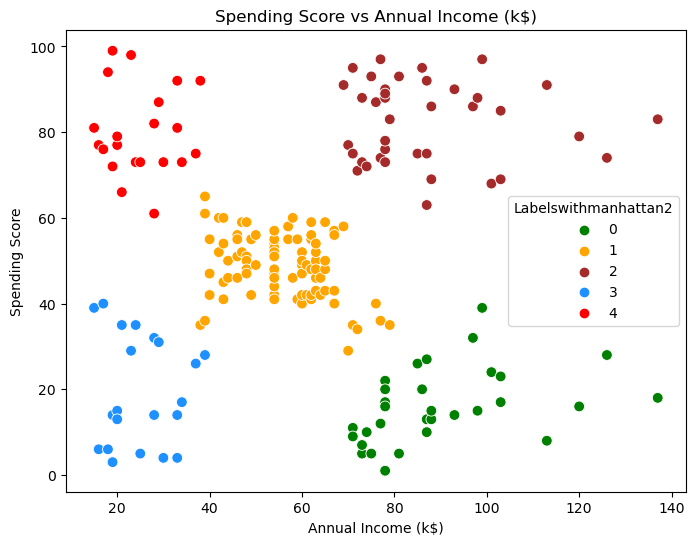

In [440]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual_Income_(k$)',y = 'Spending_Score',hue="Labelswithmanhattan2",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score') 
plt.title('Spending Score vs Annual Income (k$)')
plt.show()

### Observation
* We can see that the datapoints in these clusters are close to each other and all the clusters are clearly visible and seperable 
* This means that the data points in the cluster are similar to each other and dissimilar to data points in other clusters.
* K-means clustering was successful to diffrentiate the data into distinct classes in this case.
* These clusters are making more sense than the clusters before
* I will be performing future steps/clssification tasks with these labels/clusters.


In [441]:
#printing out labelled dataset
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,labelswithmanhattan1,Labelswithmanhattan2
0,1,19,15,39,2,3
1,1,21,15,81,2,4
2,0,20,16,6,4,3
3,0,23,16,77,3,4
4,0,31,17,40,1,3


In [442]:
# Dropping the labels which were not making sense
df = df.drop(['labelswithmanhattan1'], axis=1)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Labelswithmanhattan2
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [443]:
# Renaming the column to Labels
df = df.rename(columns={'Labelswithmanhattan2': 'Labels'})
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


### Performing standard classification tasks

In [445]:
#imprting libararies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [446]:
#Defining X and Y
X = df.drop(['Labels'], axis= 1)
y = df['Labels']

In [447]:
#splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [448]:
#logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy score: 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.79      0.85      0.81        13
           2       0.82      0.90      0.86        10
           3       1.00      0.50      0.67         6
           4       0.80      1.00      0.89         4

    accuracy                           0.85        40
   macro avg       0.88      0.85      0.85        40
weighted avg       0.86      0.85      0.84        40



C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [449]:
#decision tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy score: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       0.80      1.00      0.89         4

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [353]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy score: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        10
           3       1.00      0.83      0.91         6
           4       0.80      1.00      0.89         4

    accuracy                           0.95        40
   macro avg       0.94      0.95      0.94        40
weighted avg       0.96      0.95      0.95        40



In [450]:
# Naive Bayes Classifier 
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy score: 0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       0.80      1.00      0.89         4

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



### Observations
* The decision tree and Naive Bayes classifiers achieved the highest accuracy score of 0.975, followed by the random forest classifier with an accuracy score of 0.95, and the logistic regression classifier with an accuracy score of 0.85.
* The decision tree and Naive Bayes classifiers achieved the highest precision, recall, and F1-scores across all classes, while the logistic regression classifier had the lowest precision, recall, and F1-scores.
* The decision tree and Naive Bayes classifiers had the highest accuracy and overall performance.

## 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.

> 2.1 Import the breast_cancer dataset from sklearn.datasets library

> 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset.

> 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset.

> 2.4 What is the maximum variance explained by both the components in PCA and LDA.

> 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset. 


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the dataset from sklearn.datasets library

In [2]:
# importing dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
#printing description
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
#convert dataset to pandas DataFrame
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
#scaling the dataset 
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Performing PCA and LDA

In [21]:
#PCA
# By taking n components as 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_df)
X_pca = pca.transform(scaled_df)
print("Original shape: %s" % str(scaled_df.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [25]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(scaled_df, cancer.target)
print("Original shape: %s" % str(scaled_df.shape))
print("Reduced shape: %s" % str(X_lda.shape))

Original shape: (569, 30)
Reduced shape: (569, 1)


* After PCA we can see that our data is reduced to 2 features from 30
* After LDA we can see that our data is reduced to 1 feature from 30

#### Maximum variance explained

In [30]:
print("Explained variance ratio by PCA is",pca.explained_variance_ratio_)
print("Explained variance ratio by LDA is",lda.explained_variance_ratio_)

Explained variance ratio by PCA is [0.44272026 0.18971182]
Explained variance ratio by LDA is [1.]


#### Visualizing the components

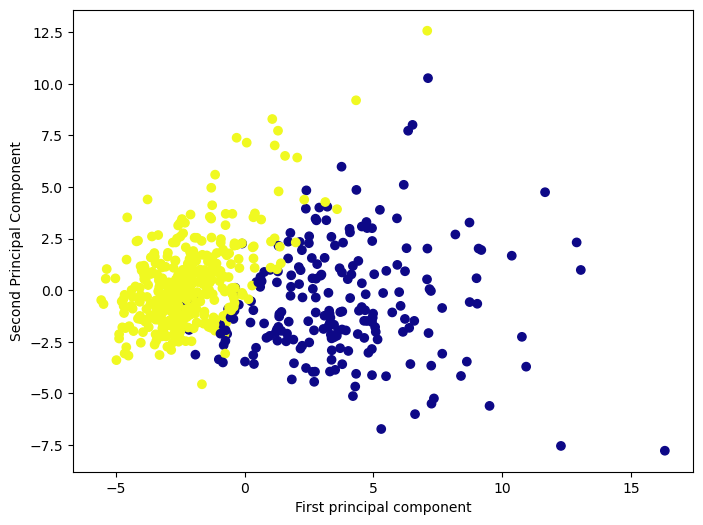

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

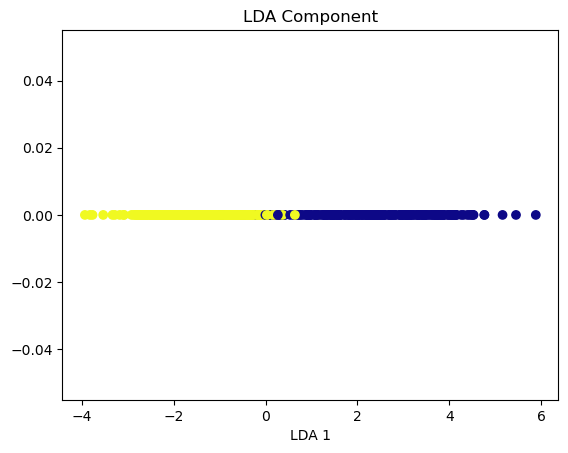

In [43]:
plt.scatter(X_lda, [0] * len(X_lda), c=cancer['target'],cmap='plasma')
plt.xlabel('LDA 1')
plt.title('LDA Component')
plt.show()

### Observations
* PCA is an unsupervised method that aims to find a new set of orthogonal features that can represent the original dataset with minimal loss of information
* LDA is a supervised method that tries to find a set of features that maximize the separation between different classes in the dataset.
*  PCA has found two principal components that explain 44.27% and 18.97% of the total variance in the data, respectively. Together, these two components explain about 63.24% of the variance in the dataset.
* LDA has found one discriminant component that explains 100% of the variance in the dataset.
* For visualizing the dataset in a lower-dimensional space PCA is a good choice as from the PCA plot we can clearly see that by using these two priciple components we can easily separate the two cancer classes.
* For performing classification on the dataset LDA is best choice as it had find out the feature that maximize the separation between different classes.
* In PCA plot there is there is a clear separation between the two classes of cancer.This indicates that the principal components found by PCA are able to capture important differences between the two classes in a lower-dimensional space.
* In LDA plot here is also a clear separation between the two classes of cancer. This indicates that the LDA component is able to separate the two classes of cancer based on the information contained in the original dataset.
